---
<font size=20> Análise de Dados: Estornos </font>

---




Notebook para analisar os estornos mensais do hotel Slaviero Essential Curitiba Shopping. As variáveis em análise são:

* **Valor**: valor, em reais, do que foi estornado (crédito ou débito);
* **Data**: período dia/mês/ano em que o estorno foi realizado;
* **Hora**: em qual horário do dia o estorno foi realizado. Utiliza-se o padrão de 12 horas;
* **Usuário**: qual funcionário do SUCT realizou o estorno;
* **Motivo**: jusiticativa do estorno.


# 1. Importações


---



## 1.1 Bibliotecas

- Pandas: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- Matplotlib: https://matplotlib.org/stable/index.html
- Seaborn: https://seaborn.pydata.org/

In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [43]:
!pip install seaborn
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1.2 Bases de Dados

### Maio

In [44]:
dataset_maio = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_maio.csv')
dataset_maio.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,107.0,57429723.0,-293.00,5/1/2022,10:04:21 AM,RFELIZ,1,ERRO DO SISTEMA
1,208.0,57825777.0,32.25,5/1/2022,1:48:40 AM,RFELIZ,1,ERRO DE LANÇAMENTO
2,510.0,57813205.0,-196.79,5/1/2022,12:14:57 PM,RFELIZ,1,ERRO DE LANÇAMENTO
3,502.0,57837422.0,-196.24,5/1/2022,11:24:00 PM,RFELIZ,1,ERRO DE LANÇAMENTO
4,510.0,57813205.0,-30.00,5/1/2022,12:13:47 PM,RFELIZ,1,ERRO DE LANÇAMENTO


### Junho

In [45]:
dataset_junho = pd.read_csv('https://raw.githubusercontent.com/strawndri/slaviero-suct-data-analysis/main/Dados/Estornos/estornos_junho.csv')
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo,Unnamed: 8
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE,NaN
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto,NaN
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto,NaN
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT,NaN


# 2. Tratamento de Dados


---



## 2.1 Removendo colunas com valores NaN

*Obs.: NaN (Not a Number) representa valores que foram perdidos e que não são apresentados na base de dados.*

> Os dados não preenchidos na coluna de *UH (Unidade Hoteleira)* referem-se aos estornos de valores que não estão associados diretamente a um hóspede. Por exemplo: é possível haver estornos de "café passante", categoria de indíviduos que não se hospedam no hotel, mas consomem deste.



In [46]:
dataset_junho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UH          467 non-null    float64
 1   Reserva     466 non-null    float64
 2   Valor       496 non-null    float64
 3   Data        496 non-null    object 
 4   Hora        496 non-null    object 
 5   Usuário     496 non-null    object 
 6   Qtde        496 non-null    int64  
 7   Motivo      496 non-null    object 
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.0+ KB


Nota-se que a última coluna "Unnamed" veio, provavelmente, de algum erro na formação da tabela.

Todos as linhas dessa coluna são NaN e, portanto, devem ser removidos.

In [47]:
dataset_junho.drop(columns = ['Unnamed: 8'], inplace = True)
dataset_junho.head()

,UH,Reserva,Valor,Data,Hora,Usuário,Qtde,Motivo
0,1008.0,58380248.0,8.00,6/1/2022,12:00:33 PM,IGPESSOA,1,LCTO EM DUPLICIDADE
1,105.0,57936668.0,144.90,6/1/2022,7:28:51 PM,CALOLIVEIRA,1,Erro de Laçto
2,109.0,57850003.0,470.40,6/1/2022,9:02:50 AM,LPADOVINO,1,Erro de Laçto
3,205.0,58380973.0,-5.00,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT
4,205.0,58380973.0,-3.94,6/1/2022,12:36:00 PM,CALOLIVEIRA,1,AUTORIZADO PELO GERENT


## 2.2 Alterando os nomes das colunas

In [48]:
new_columns = {
    'UH': 'UH',	
    'Reserva': 'reserva',
    'Descrição': 'descricao',
    'Crédito': 'credito',
    'Débito': 'debito',
    'Valor': 'valor',
    'Data': 'data',
    'Hora': 'hora',
    'Usuário': 'usuario',
    'Qtde.': 'quantidade',
    'Motivo': 'motivo'
}

dataset_maio.rename(columns = new_columns, inplace = True)
dataset_junho.rename(columns = new_columns, inplace = True)

## 3. Funções e variáveis padronizados

In [49]:
palette = ['#022C30', '#194647', '#256669', '#2E8285', '#3EACB0', '#41B6BA', '#84D9E0', '#9ED7EC', '#D0E9FF']

In [50]:
# Definições utilizadas em todos os gráficos

def plot_config(width, height):
  sns.set_style('darkgrid')
  plt.figure(figsize=(width, height))

In [62]:
''' Função para criação de gráficos de barra
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_barplot(x, y, data, xlabel, ylabel, title, palette=palette, hue=None):

  plot_config(15, 5)
  ax = sns.barplot(x=x, y=y, palette=palette, data=data, hue=hue)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

In [63]:
''' Função para geração de gráficos de curva
- x:
- y:
- xlabel:
- ylabel:
- title: 
'''

def set_lineplot(x, y, xlabel, ylabel, title):
  plot_config(15, 5)
  ax = sns.lineplot(x=x, y=y)
  ax.set_title(title, fontsize = 18)
  ax.set_xlabel(xlabel, fontsize = 12)
  ax.set_ylabel(ylabel, fontsize = 12)

  ax

## 4. Análise de Dados

### 4.1 Quantidade de estornos por usuário

In [53]:
frequency = dataset_maio.usuario.value_counts()
users = dataset_maio.usuario.unique()

users_frequency = pd.DataFrame({'estornos': frequency})
users_frequency.rename_axis('usuarios', axis = 'columns', inplace = True)
users_frequency

usuarios,estornos
RFELIZ,173
CALOLIVEIRA,127
RFREITAS,100
ECSOUSA,65
LPADOVINO,57
IGPESSOA,51
CFIOR,30
ANLGONCALVES,21


In [64]:
graphic = set_barplot(x=users_frequency.index, y='estornos', data = users_frequency, 
                      xlabel = 'Usuários', ylabel ='Estornos', 
                      title = 'Quantidade de estornos realizada por cada usuário',
                      palette = [palette[5]])
graphic

TypeError: ignored

### 4.2 Quantidade de estornos diários

In [55]:
estornos_por_dia = pd.value_counts(dataset_maio.data)
dias = []
for i in dataset_maio.data.unique():
  dias.append(i[2:-5])

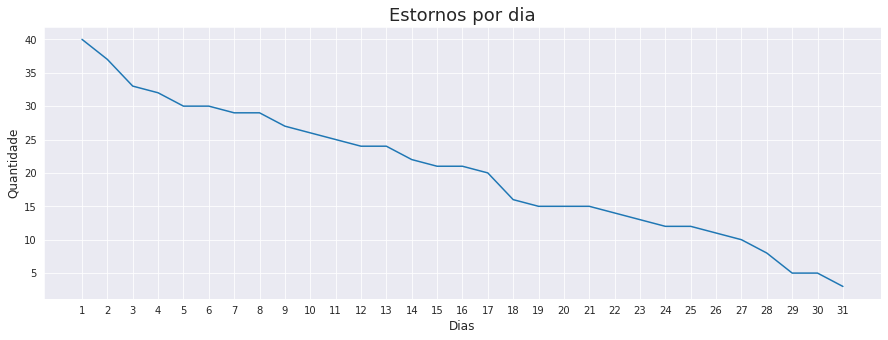

In [56]:
set_lineplot(dias, estornos_por_dia, "Dias", 'Quantidade', 'Estornos por dia')

### 4.3 Quantidade de estornos realizada por cada usuário (classificação)

In [57]:
motivos_por_usuario = pd.crosstab(dataset_maio['usuario'], dataset_maio['motivo'])
motivos_por_usuario = pd.DataFrame(motivos_por_usuario.stack().reset_index())
motivos_por_usuario.rename(columns = {0: 'total'}, inplace = True)
motivos_por_usuario.sort_values(by=['total'], ascending = False, inplace = True)

motivos_por_usuario

,usuario,motivo,total
9,CALOLIVEIRA,AUTORIZADO PELO GERENT,109
56,RFELIZ,ERRO DE LANÇAMENTO,99
65,RFREITAS,ERRO DE LANÇAMENTO,58
29,ECSOUSA,ERRO DE LANÇAMENTO,34
47,LPADOVINO,ERRO DE LANÇAMENTO,28
...,...,...,...
1,ANLGONCALVES,CORTESIA DE DIÁRIAS,0
37,IGPESSOA,CORTESIA DE DIÁRIAS,0
40,IGPESSOA,ERRO NA IMPRESSÃO,0
43,IGPESSOA,LCTO EM DUPLICIDADE,0


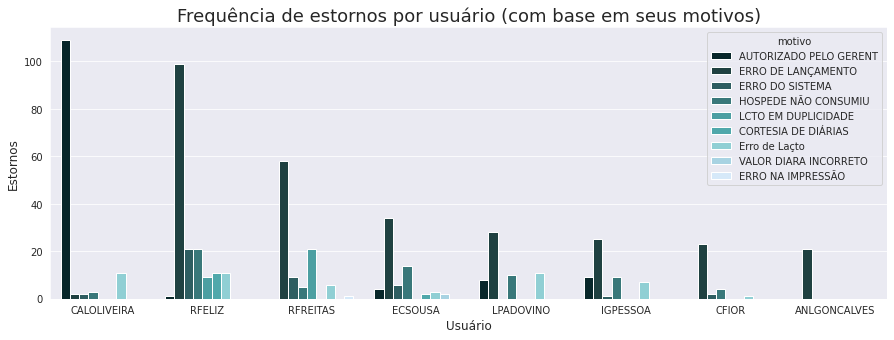

In [58]:
set_barplot('usuario', 'total', motivos_por_usuario, 
            'Usuário', 'Estornos', 
            'Frequência de estornos por usuário (com base em seus motivos)',
            hue = 'motivo')

### 4.4 Valor total de estornos por dia

In [59]:
valor_por_dia = dataset.groupby(['data'])['valor'].sum()

In [60]:
for i in range(0, len(valor_por_dia)):
  if valor_por_dia[i] <= 0:
    valor_por_dia[i] *= -1

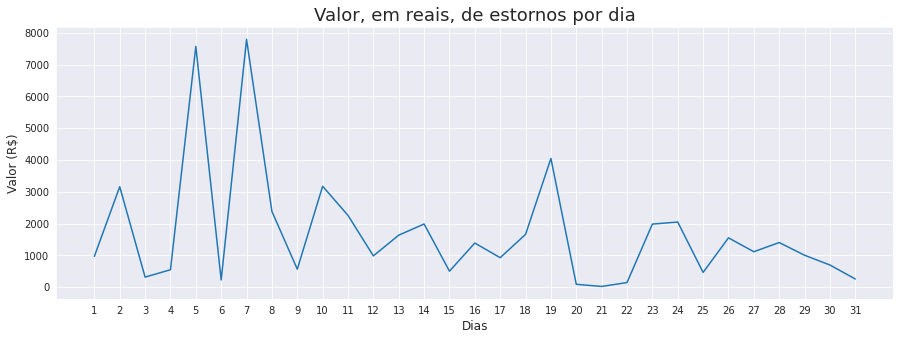

In [61]:
set_lineplot(dias, valor_por_dia, "Dias", 'Valor (R$)', 'Valor, em reais, de estornos por dia')